<a href="https://colab.research.google.com/github/valogonor/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

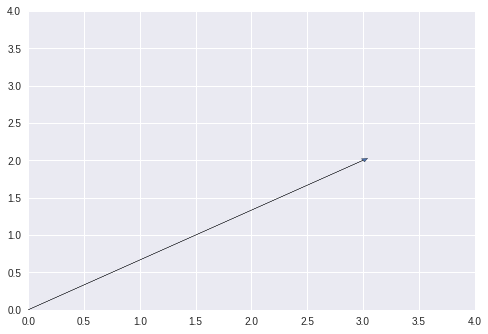

In [1]:
import matplotlib.pyplot as plt
a = [3, 2]
plt.arrow(0, 0, a[0], a[1], head_width=.05, head_length=.05)
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
import numpy as np
b = [17, -4, -2, 1]
print('||b||:', np.linalg.norm(b)) # The norm of a vector represents its length.

||b||: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
E = np.mat([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
print('E^-1: \n', E.I)
print('E^T: \n', E.T)

E^-1: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
E^T: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [5]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [6]:
print('Mean of customers:', df.customers.mean())
print('Mean inches of snow:', df.snow.mean())
print('Variance of customers:', df.customers.var())
print('Variance of inches of snow:', df.snow.var())
print('Standard deviation of customers:', df.customers.std())
print('Standard deviation of inches of snow:', df.snow.std())

Mean of customers: 1135.7142857142858
Mean inches of snow: 2.7142857142857144
Variance of customers: 98761.90476190478
Variance of inches of snow: 8.571428571428571
Standard deviation of customers: 314.26406851866597
Standard deviation of inches of snow: 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No because the numbers involved in the two variables are completely different. The number of customers is measured in the hundreds or thousands, while inches of is
# measured in units of less than 10. Variance is not standardized and, therefore, not comparable.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
np.cov(df.customers, df.snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [10]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [11]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [12]:
X.shape

(4, 17)

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535,  0.73740709, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112,  0.13055067],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047,  0.9292974 ,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624,  1.54795798],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912, -0.0575671 , -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664, -0.54085279],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 , -1.60913739,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [15]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit to our X values
pca.fit(X_std)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)

print("\n Eigenvalues: \n", pca.explained_variance_)

print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])
print(pca.explained_variance_ratio_)

# transform data
X_transformed = pd.DataFrame(pca.transform(X_std), # 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'
                columns=['PC1','PC2','PC3','PC4'])


 Eigenvectors: 
 [[-0.25509484 -0.27747513  0.28562914 -0.17843996 -0.24572131 -0.25275834
  -0.12719487 -0.28611787 -0.27890521  0.09775901 -0.26544997 -0.26481055
  -0.28708628 -0.12073819 -0.25767815  0.22771961 -0.2811012 ]
 [ 0.23231808 -0.13773847 -0.07716993 -0.32902948  0.24708041  0.21105701
  -0.40054501 -0.01100602  0.08174644 -0.45468785 -0.0964863   0.13610704
  -0.09282322  0.41036129 -0.1539603   0.29323981 -0.13684092]
 [-0.11736728 -0.14839777  0.15327713 -0.38616448  0.18723888 -0.24529742
  -0.34010234  0.20499304  0.2428402  -0.11338943  0.35064519 -0.30439545
   0.07333507 -0.32037834  0.33340494 -0.17168328 -0.05073161]
 [ 0.80625169  0.19387066 -0.14632526  0.01866588 -0.13010352 -0.33756965
  -0.23217519 -0.07411736 -0.07485098  0.18690625 -0.04468974 -0.1383045
  -0.02340534 -0.1827877  -0.00624012  0.06742816 -0.01128752]]

 Eigenvalues: 
 [1.54876508e+01 5.63749203e+00 1.54152380e+00 2.97764819e-31]

 % variance explained: 
 ['68.3%', '24.9%', '6.8%', '0.0%'

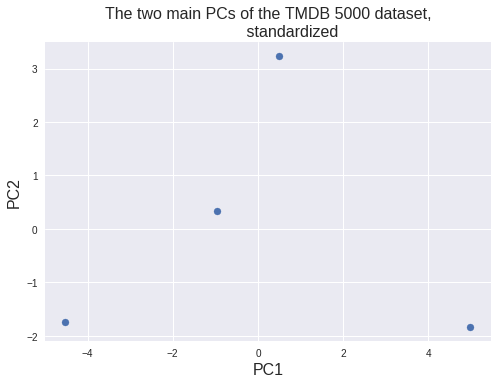

In [16]:
# Plotting datapoints based only on the two top PCs of the 
# scaled dataset.
fig, ax = plt.subplots()
ax.scatter(X_transformed['PC1'], 
           X_transformed['PC2'])
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The two main PCs of the TMDB 5000 dataset,\n \
          standardized', fontsize=16)
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [17]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

In [19]:
points.isna().sum()

x    0
y    0
dtype: int64

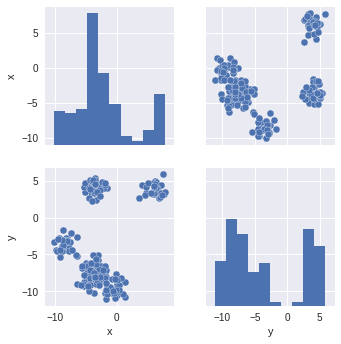

In [20]:
import seaborn as sns
sns.pairplot(points);

In [21]:
scaler = StandardScaler()
points_std = pd.DataFrame(scaler.fit_transform(points), columns=points.columns)
points_std.describe()

,x,y
count,2.000000e+02,2.000000e+02
mean,4.662937e-17,8.881784e-18
std,1.002509e+00,1.002509e+00
min,-1.715069e+00,-1.378308e+00
25%,-5.052073e-01,-8.665439e-01
50%,-2.311267e-01,-3.385765e-01
75%,4.171789e-01,1.218429e+00
max,2.229030e+00,1.671647e+00


In [22]:
pca = PCA()

# Fit to our X values
pca.fit(points_std)

# access values and vectors
print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])

# transform data
points_transformed_std = pd.DataFrame(pca.transform(points_std),
                    columns=['PC1','PC2'])


 Eigenvalues: 
 [1.37359373 0.63645652]

 % variance explained: 
 ['68.3%', '31.7%']


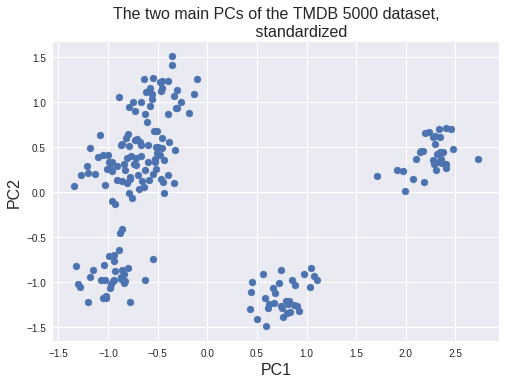

In [23]:
fig, ax = plt.subplots()
ax.scatter(points_transformed_std['PC1'], 
           points_transformed_std['PC2'])
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The two main PCs of the TMDB 5000 dataset,\n \
          standardized', fontsize=16)
plt.show()

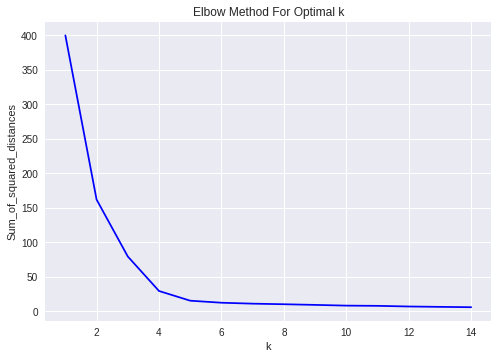

In [24]:
from sklearn.cluster import KMeans
# Let's make an elbow plot to choose a K for KM Clustering. This code
# runs on the whole dataset, including all 7 PCs.
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points_transformed_std)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
km = KMeans(n_clusters=4)
km = km.fit(points_transformed_std[['PC1','PC2']])

# Make new dataframe with all the data we care about
points_final = points_transformed_std[['PC1','PC2']].copy()
points_final['cluster'] = km.labels_
points_final.head()

,PC1,PC2,cluster
0,-0.859119,-0.859524,1
1,-0.631241,0.248206,0
2,-0.462188,1.125087,0
3,-0.863236,-0.405686,1
4,-0.561522,1.034245,0


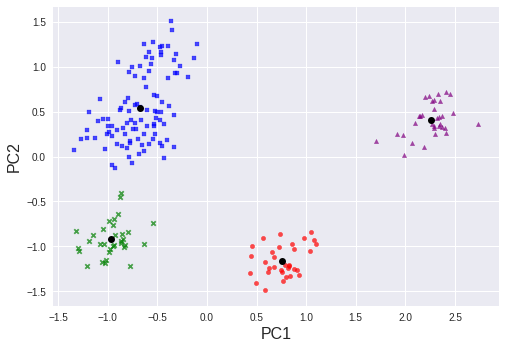

In [26]:
from mlxtend.plotting import category_scatter

centroids = points_final.groupby('cluster').mean()

fig = category_scatter(data=points_final,
                       x = 'PC1', 
                       y = 'PC2', 
                       label_col = 'cluster', legend_loc=False)

for cent in centroids.iterrows():
    plt.plot(cent[1][0], cent[1][1], "ok")

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)

plt.show()